In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [5]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [6]:
y=data['Admitted']
x1=data['SAT']

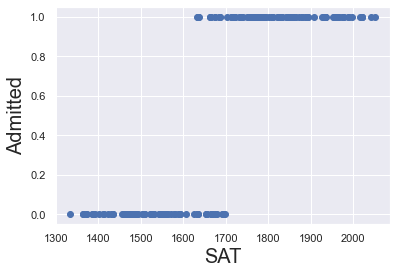

In [7]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

In [8]:
x = sm.add_constant(x1)
reg = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


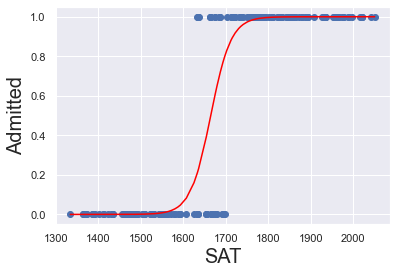

In [11]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))
f_sorted = np.sort(f(x1,reg.params[0],reg.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.plot(x_sorted,f_sorted,color='Red')
plt.show()

In [12]:
reg.pred_table()

array([[67.,  7.],
       [ 7., 87.]])

In [15]:
#cm_df = confusion matrix data frame
cm_df = pd.DataFrame(reg.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df.index = ['Actual 0','Actual 1']
cm_df

,Predicted 0,Predicted 1
Actual 0,67.0,7.0
Actual 1,7.0,87.0


In [17]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666

In [22]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Aug 2021   Pseudo R-squ.:                  0.7992
Time:                        00:15:11   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [74]:
SAT = int(input())
yhat = reg.params[0]+reg.params[1]*SAT
p = 1/(1+np.exp(-yhat))
if p>0.5:
    print('Probability:',(p*100))
    print('1')
else:
    print('Probability:',p*100)
    print('0')
    

1750
Probability: 97.32918321765854
1
